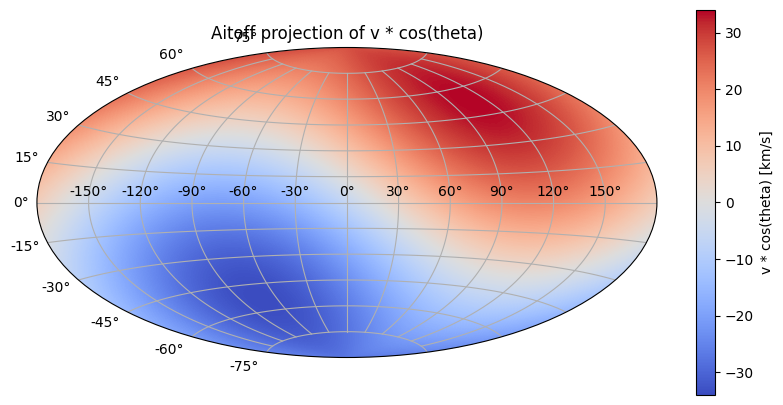

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
v = -34  # km/s
ra_center = np.radians(-73)  # Convert RA to radians
dec_center = np.radians(-53)  # Convert Dec to radians

# Generate a grid of RA and Dec values for the plot
ra = np.linspace(-np.pi, np.pi, 1000)
dec = np.linspace(-np.pi / 2, np.pi / 2, 500)
RA, DEC = np.meshgrid(ra, dec)

# Function to calculate angular distance (theta) on the sky
def angular_distance(ra1, dec1, ra2, dec2):
    return np.arccos(
        np.sin(dec1) * np.sin(dec2) +
        np.cos(dec1) * np.cos(dec2) * np.cos(ra1 - ra2)
    )

# Calculate angular distance relative to the given center point
theta = angular_distance(RA, DEC, ra_center, dec_center)

# Calculate v * cos(theta)
v_cos_theta = v * np.cos(theta)

# Create the Aitoff projection plot
plt.figure(figsize=(10, 5))
plt.subplot(111, projection="aitoff")
plt.grid(True)

# Plot the data using a heatmap
plt.pcolormesh(RA, DEC, v_cos_theta, shading='auto', cmap='coolwarm')

# Add a color bar to show the velocity scale
plt.colorbar(label='v * cos(theta) [km/s]')

# Show the plot
plt.title("Aitoff projection of v * cos(theta)")
plt.show()


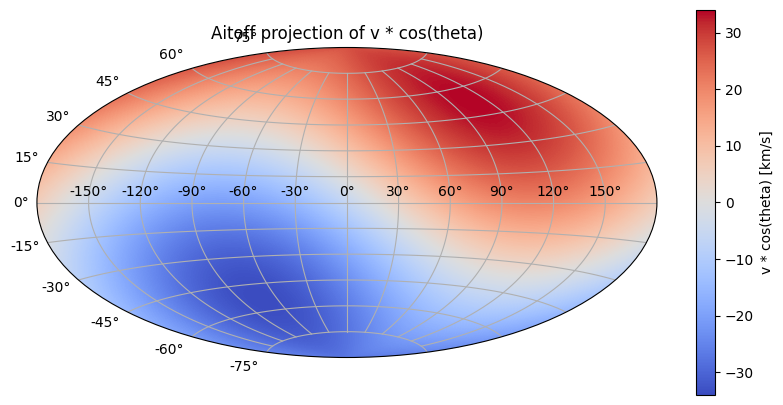

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
v = 34  # km/s
ra_center = np.radians(107)  # Convert RA to radians
dec_center = np.radians(53)  # Convert Dec to radians

# Generate a grid of RA and Dec values for the plot
ra = np.linspace(-np.pi, np.pi, 1000)
dec = np.linspace(-np.pi / 2, np.pi / 2, 500)
RA, DEC = np.meshgrid(ra, dec)

# Function to calculate angular distance (theta) on the sky
def angular_distance(ra1, dec1, ra2, dec2):
    return np.arccos(
        np.sin(dec1) * np.sin(dec2) +
        np.cos(dec1) * np.cos(dec2) * np.cos(ra1 - ra2)
    )

# Calculate angular distance relative to the given center point
theta = angular_distance(RA, DEC, ra_center, dec_center)

# Calculate v * cos(theta)
v_cos_theta = v * np.cos(theta)

# Create the Aitoff projection plot
plt.figure(figsize=(10, 5))
plt.subplot(111, projection="aitoff")
plt.grid(True)

# Plot the data using a heatmap
plt.pcolormesh(RA, DEC, v_cos_theta, shading='auto', cmap='coolwarm')

# Add a color bar to show the velocity scale
plt.colorbar(label='v * cos(theta) [km/s]')

# Show the plot
plt.title("Aitoff projection of v * cos(theta)")
plt.show()


In [29]:


from exptool.io import particle


In [30]:
O = particle.Input('/Users/mpetersen/Downloads/OUT.runc20d.00000','mw')



In [31]:
O.data['x'].size

10000000

In [117]:
posscale = 200.
velscale = 150.
R = posscale*np.sqrt(O.data['x']**2 + O.data['y']**2 + O.data['z']**2)

Lx = posscale*velscale*(O.data['y']*O.data['vz'] - O.data['z']*O.data['vy'])/1000
Ly = posscale*velscale*(O.data['z']*O.data['vx'] - O.data['x']*O.data['vz'])/1000
Lz = posscale*velscale*(O.data['x']*O.data['vy'] - O.data['y']*O.data['vx'])/1000

vr = velscale*(O.data['vx']*O.data['x'] + O.data['vy']*O.data['y'] + O.data['vz']*O.data['z'])
galacticl = np.arctan2(O.data['y'],O.data['x'])#*180/np.pi
galacticb = np.arcsin(posscale*O.data['z']/R)#*180/np.pi

In [118]:
criteria = (R > 40) & (R<120)
R[criteria].size
nlim=10000


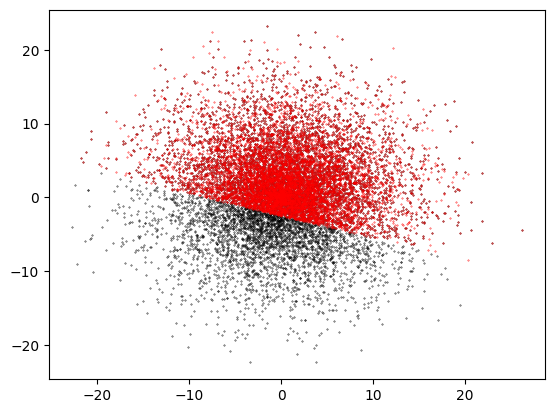

In [119]:
criteriaL = (R > 40) & (R<120) & (Ly > -2.5 - 0.3*Lz)

nlim=10000
plt.scatter(Lz[criteria][0:nlim],Ly[criteria][0:nlim],s=0.1,color='black')
plt.scatter(Lz[criteriaL][0:nlim],Ly[criteriaL][0:nlim],s=0.1,color='red')

In [120]:
print(Lz[criteriaL].size/Lz[criteria].size)

0.6785006160257046


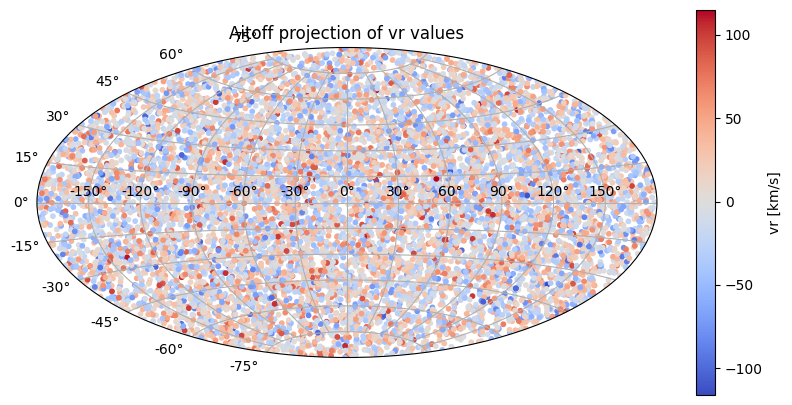

In [121]:
# Create the Aitoff projection plot for vr values using criteria
plt.figure(figsize=(10, 5))
plt.subplot(111, projection="aitoff")
plt.grid(True)

# Filter RA and DEC values using the criteria
l_filtered = galacticl[criteria][0:nlim]
b_filtered = galacticb[criteria][0:nlim]
vr_filtered = vr[criteria][0:nlim]

# Plot the data using a scatter plot
plt.scatter(l_filtered, b_filtered, c=vr_filtered, s=10.0, cmap='coolwarm')

# Add a color bar to show the velocity scale
plt.colorbar(label='vr [km/s]')

# Show the plot
plt.title("Aitoff projection of vr values")
plt.show()

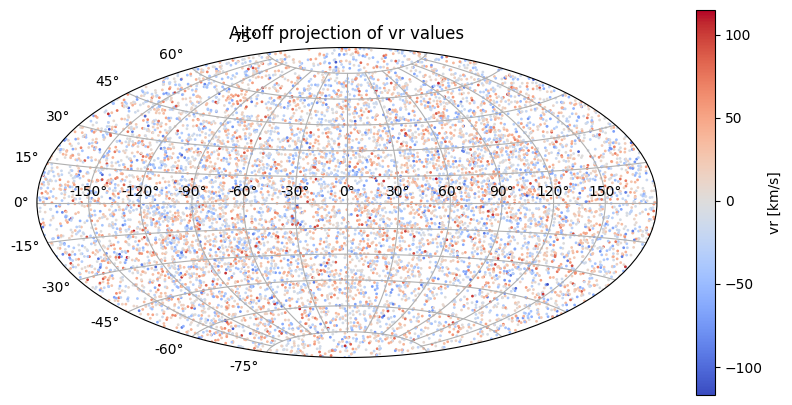

In [122]:
# Create the Aitoff projection plot for vr values using criteria
plt.figure(figsize=(10, 5))
plt.subplot(111, projection="aitoff")
plt.grid(True)

# Filter RA and DEC values using the criteria
l_filtered = galacticl[criteriaL][0:nlim]
b_filtered = galacticb[criteriaL][0:nlim]
vr_filtered = vr[criteriaL][0:nlim]

# Plot the data using a scatter plot
plt.scatter(l_filtered, b_filtered, c=vr_filtered, s=1.0, cmap='coolwarm')

# Add a color bar to show the velocity scale
plt.colorbar(label='vr [km/s]')

# Show the plot
plt.title("Aitoff projection of vr values")
plt.show()

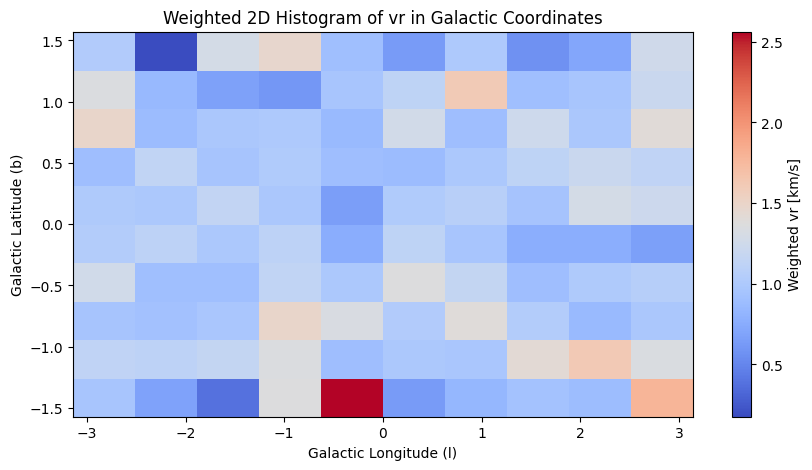

In [123]:
# Define the number of bins for galactic coordinates
num_bins_l = 10  # Number of bins in galactic longitude
num_bins_b = 10  # Number of bins in galactic latitude

# Create bins for galactic longitude and latitude
l_bins = np.linspace(-np.pi, np.pi, num_bins_l + 1)
b_bins = np.linspace(-np.pi / 2, np.pi / 2, num_bins_b + 1)

# Compute the weighted 2D histogram
histV, l_edges, b_edges = np.histogram2d(galacticl[criteria], galacticb[criteria], bins=[l_bins, b_bins], weights=vr[criteria])
histN, l_edges, b_edges = np.histogram2d(galacticl[criteria], galacticb[criteria], bins=[l_bins, b_bins], weights=None)


# Plot the weighted 2D histogram
plt.figure(figsize=(10, 5))
plt.imshow(histV.T/histN.T, origin='lower', aspect='auto', extent=[-np.pi, np.pi, -np.pi / 2, np.pi / 2], cmap='coolwarm')
#plt.imshow(histN.T, origin='lower', aspect='auto', extent=[-np.pi, np.pi, -np.pi / 2, np.pi / 2], cmap='Greys')
plt.colorbar(label='Weighted vr [km/s]')
plt.xlabel('Galactic Longitude (l)')
plt.ylabel('Galactic Latitude (b)')
plt.title('Weighted 2D Histogram of vr in Galactic Coordinates')
plt.show()

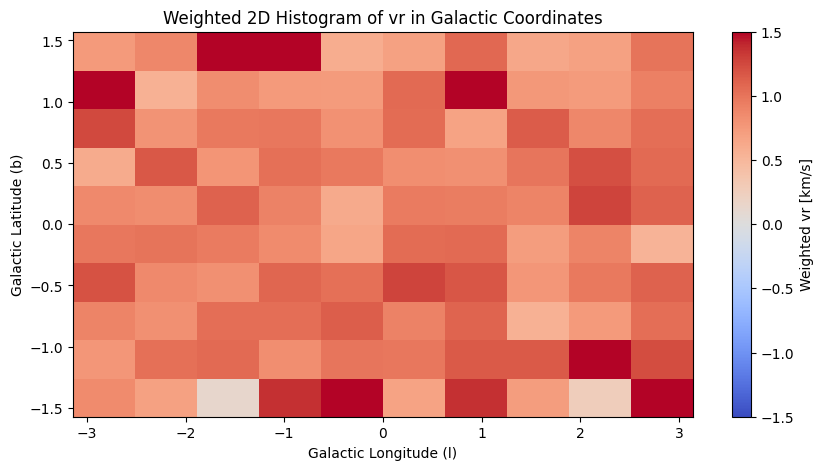

In [124]:

# Compute the weighted 2D histogram
histV, l_edges, b_edges = np.histogram2d(galacticl[criteriaL], galacticb[criteriaL], bins=[l_bins, b_bins], weights=vr[criteriaL])
histN, l_edges, b_edges = np.histogram2d(galacticl[criteriaL], galacticb[criteriaL], bins=[l_bins, b_bins], weights=None)


# Plot the weighted 2D histogram
plt.figure(figsize=(10, 5))
plt.imshow(histV.T/histN.T, origin='lower', aspect='auto', extent=[-np.pi, np.pi, -np.pi / 2, np.pi / 2], vmin=-1.5,vmax=1.5,cmap='coolwarm')
#plt.imshow(histN.T, origin='lower', aspect='auto', extent=[-np.pi, np.pi, -np.pi / 2, np.pi / 2], cmap='Greys')
plt.colorbar(label='Weighted vr [km/s]')
plt.xlabel('Galactic Longitude (l)')
plt.ylabel('Galactic Latitude (b)')
plt.title('Weighted 2D Histogram of vr in Galactic Coordinates')
plt.show()

In [103]:
# Define the number of bins for galactic coordinates
num_bins_l = 30  # Number of bins in galactic longitude
num_bins_b = 15  # Number of bins in galactic latitude

# Create bins for galactic longitude and latitude
l_bins = np.linspace(-np.pi, np.pi, num_bins_l + 1)
b_bins = np.linspace(-np.pi / 2, np.pi / 2, num_bins_b + 1)

# Digitize the galactic coordinates to find the bin indices
l_indices = np.digitize(galacticl[criteria], l_bins) - 1
b_indices = np.digitize(galacticb[criteria], b_bins) - 1

# Initialize arrays to store the sum of vr values and the count of points in each bin
vr_sum_bins = np.zeros((num_bins_l, num_bins_b))
vr_count_bins = np.zeros((num_bins_l, num_bins_b))


In [56]:
# Accumulate vr values and counts in each bin
for i in range(len(vr)):
    if 0 <= l_indices[i] < num_bins_l and 0 <= b_indices[i] < num_bins_b:
        vr_sum_bins[l_indices[i], b_indices[i]] += vr[i]
        vr_count_bins[l_indices[i], b_indices[i]] += 1

# Compute the mean vr in each bin
mean_vr_bins = np.zeros_like(vr_sum_bins)
valid_bins = vr_count_bins > 0
mean_vr_bins[valid_bins] = vr_sum_bins[valid_bins] / vr_count_bins[valid_bins]


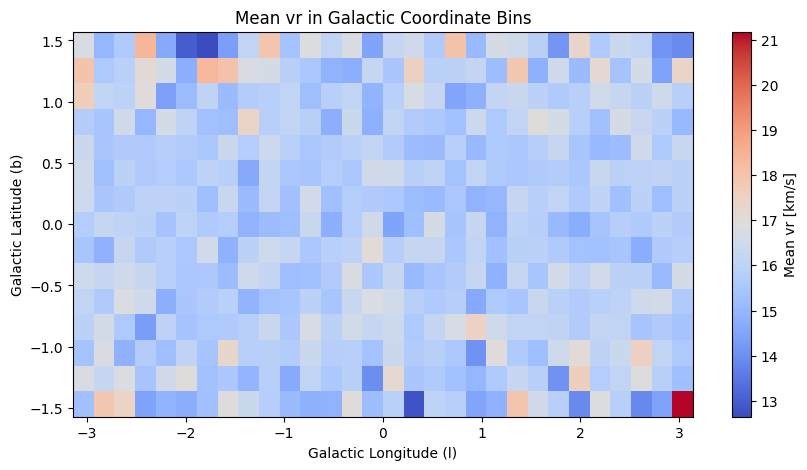

In [57]:

# Plot the mean vr in bins
plt.figure(figsize=(10, 5))
plt.imshow(mean_vr_bins.T, origin='lower', aspect='auto', extent=[-np.pi, np.pi, -np.pi / 2, np.pi / 2], cmap='coolwarm')
plt.colorbar(label='Mean vr [km/s]')
plt.xlabel('Galactic Longitude (l)')
plt.ylabel('Galactic Latitude (b)')
plt.title('Mean vr in Galactic Coordinate Bins')
plt.show()



In [53]:
import healpy as hp
import numpy as np

# Define the number of divisions (NSIDE parameter) for HEALPix
nside = 6  # You can adjust this value based on the desired resolution

# Convert galactic coordinates to HEALPix pixel indices
pixels = hp.ang2pix(nside, galacticl, galacticb, lonlat=True)

# Initialize an array to store the sum of vr values and the count of points in each pixel
vr_sum = np.zeros(hp.nside2npix(nside))
vr_count = np.zeros(hp.nside2npix(nside))

# Accumulate vr values and counts in each pixel
np.add.at(vr_sum, pixels, vr)
np.add.at(vr_count, pixels, 1)

# Compute the mean vr in each pixel
mean_vr = np.zeros_like(vr_sum)
valid_pixels = vr_count > 0
mean_vr[valid_pixels] = vr_sum[valid_pixels] / vr_count[valid_pixels]

# Plot the mean vr in HEALPix map
hp.mollview(mean_vr, title="Mean vr in HEALPix pixels", unit="km/s", cmap='coolwarm')
hp.graticule()
plt.show()

ImportError: dlopen(/opt/homebrew/lib/python3.11/site-packages/healpy/_healpy_sph_transform_lib.cpython-311-darwin.so, 0x0002): Library not loaded: /private/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/pip-install-5_jmgsde/healpy_5a8bfb8b4ae448aaa72db10fe3548f70/build/temp.macosx-12-arm64-cpython-311/lib/libsharp.2.dylib
  Referenced from: /opt/homebrew/lib/python3.11/site-packages/healpy/_healpy_sph_transform_lib.cpython-311-darwin.so
  Reason: tried: '/private/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/pip-install-5_jmgsde/healpy_5a8bfb8b4ae448aaa72db10fe3548f70/build/temp.macosx-12-arm64-cpython-311/lib/libsharp.2.dylib' (no such file), '/usr/local/lib/libsharp.2.dylib' (no such file), '/usr/lib/libsharp.2.dylib' (no such file)